In [1]:
from pathlib import Path
import os
import sys

sys.path.append(Path(os.path.abspath('')).parent.parent)
os.chdir(Path(os.path.abspath('')).parent.parent)

import numpy as np
import pandas as pd 
import xarray as xr


import config.settings as cset
from config.settings import (labelsize_small, 
                            labelsize_medium, 
                            labelsize_large,
                            focus_countries,
                            focus_countries_names,
                            focus_countries_colors, 
                            focus_scenarios_color_dict,
                            focus_scenarios_labels,
                            cmap_diverging,
                            cmap_negref
                            )

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import geopandas as gpd 
from matplotlib import colormaps as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import box
from matplotlib.gridspec import GridSpec

plt.rcParams['svg.fonttype'] = 'none'

In [2]:
thrshld = 1.35
gmt_ds = pd.read_csv(cset.path_MESMER_char / f'gmt_dataset.csv', index_col = 0)

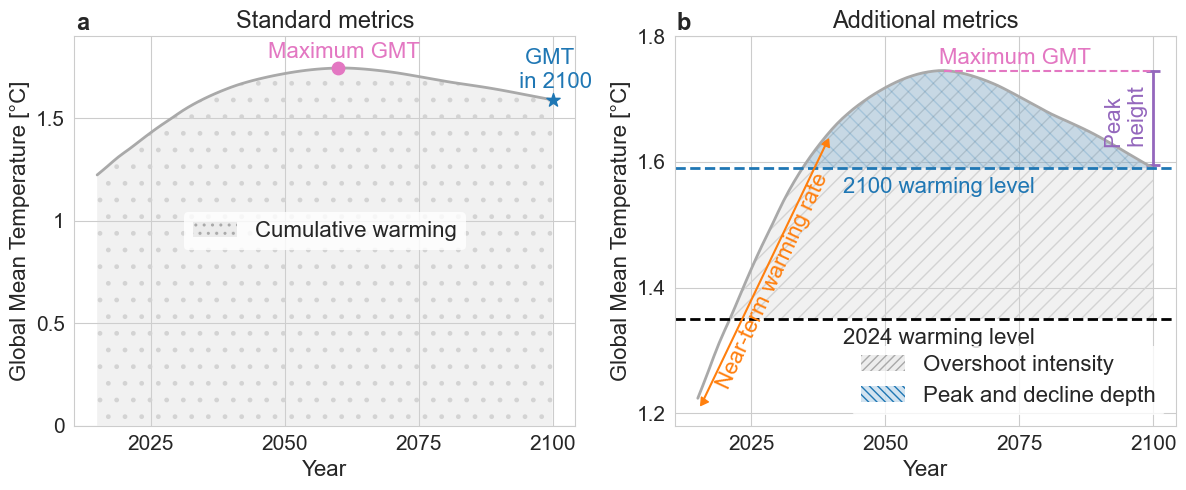

In [25]:
with sns.axes_style('whitegrid'):
        fig, axes = plt.subplots(1,2,figsize = (12,5))
        
        ax = axes[0]
        ax.plot(gmt_ds.index, 
                gmt_ds.iloc[:, 298], 
                color = 'darkgray', lw = 2)
        
        ax.fill_between(gmt_ds.index, [0]*len(gmt_ds.iloc[:, 298].values), gmt_ds.iloc[:, 298], color = 'lightgray', edgecolor = 'None', alpha = .3, hatch = '.')   
        ax.scatter([2060], [gmt_ds.iloc[:, 298].values.max()], marker = 'o', color = 'C6', zorder = 10, s = 80)
        ax.scatter([2100], [gmt_ds.iloc[:, 298].values[-1]], marker = '*', color = 'C0', zorder = 10, s = 100)
        ax.text(2061, gmt_ds.iloc[:, 298].values.max()+0.05, 'Maximum GMT', fontsize = labelsize_medium, color = 'C6', ha = 'center')
        ax.text(2100, gmt_ds.iloc[:, 298].values[-1]+0.06, 'GMT \n in 2100', fontsize = labelsize_medium, color = 'C0', ha = 'center')
        
        ax.fill_between(gmt_ds.index, 0, 0, 
                    color = 'darkgray', edgecolor = 'None', alpha = .2, hatch = '..', label = 'Cumulative warming')  
        
        ax.set_xticks([2025, 2050, 2075, 2100], 
                        [2025, 2050, 2075, 2100], 
                        fontsize = labelsize_small
                        )
        ax.set_xlabel('Year', fontsize = labelsize_medium)
        ax.set_yticks([0, 0.5, 1, 1.5],
                       [0, 0.5, 1, 1.5],
                        fontsize = labelsize_small
                        )
        ax.set_ylim(0, 1.9)
        ax.set_ylabel('Global Mean Temperature [°C]', fontsize = labelsize_medium)
        ax.set_title('Standard metrics', fontsize = labelsize_large)
        ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'center', frameon = True, facecolor = (1,1,1,0.7), edgecolor = 'none')
        ax.text(2011, 1.93, 'a', fontsize = labelsize_large, fontweight = 'bold')
        
        ax = axes[1]
        ax.plot(gmt_ds.index, 
                gmt_ds.iloc[:, 298], 
                color = 'darkgray', lw = 2)
        ax.axhline(thrshld, 
                color = 'black', 
                linestyle = '--', lw = 2)
        ax.text(2060, 1.31, '2024 warming level', fontsize = labelsize_medium, ha = 'center')
        gmt_trajectories_adj = gmt_ds.iloc[:, 298].copy().values
        gmt_trajectories_adj[gmt_trajectories_adj < thrshld] = thrshld
        ax.fill_between(gmt_ds.index, np.repeat(thrshld, len(gmt_ds.index)), gmt_trajectories_adj, 
                        color = 'lightgray', edgecolor = 'None', alpha = .3, hatch = '//')    
        ax.axhline(gmt_ds.iloc[:, 298].values[-1], 
                color = 'C0', 
                linestyle = '--', lw = 2)
        gmt_trajectories_adj_2 = gmt_ds.iloc[:, 298].copy().values
        gmt_trajectories_adj_2[gmt_trajectories_adj_2 < gmt_ds.iloc[:, 298].values[-1]] = gmt_ds.iloc[:, 298].values[-1]
        ax.fill_between(gmt_ds.index, gmt_ds.iloc[:, 298].values[-1], gmt_trajectories_adj_2, color = 'C0', alpha = .2, edgecolor = 'None', hatch = '\\\\')
        ax.text(2060, 1.55, '2100 warming level', fontsize = labelsize_medium, ha = 'center', color = 'C0')
        ax.plot([2016, 2039], [1.22, 1.63], color = 'C1')
        ax.scatter([2016], [1.22], s = 50, marker = (3, 0, 25), color = 'C1')
        ax.scatter([2039], [1.63], s = 50, marker = (3, 0, 215), color = 'C1')
        ax.plot([2100,2100], [gmt_ds.iloc[:, 298].values[-2], gmt_ds.iloc[:, 298].values.max()], color = 'C4', lw = 2)
        ax.scatter([2100, 2100], [gmt_ds.iloc[:, 298].values[-2], gmt_ds.iloc[:, 298].values.max()], marker = '_', color = 'C4', s = 100, lw = 2)
        ax.plot([2061, 2100], [gmt_ds.iloc[:, 298].values.max(),gmt_ds.iloc[:, 298].values.max()], linestyle = '--', color = 'C6')
        ax.text(2018, 1.24, 'Near-term warming rate', rotation = 65, fontsize = labelsize_medium, color = 'C1')
        ax.text(2095, 1.62, 'Peak \n height', rotation = 90, fontsize = labelsize_medium, color = 'C4', ha = 'center')
        ax.text(2060, gmt_ds.iloc[:, 298].values.max()+0.01, 'Maximum GMT', fontsize = labelsize_medium, color = 'C6')
        ax.fill_between(gmt_ds.index, 0, 0, 
                    color = 'darkgray', edgecolor = 'None', alpha = .2, hatch = '////', label = 'Overshoot intensity')    
        ax.fill_between(gmt_ds.index, 0, 0, 
                    color = 'C0', edgecolor = 'None', alpha = .2, hatch = '\\\\\\\\', label = 'Peak and decline depth')    
        ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'lower right', frameon = True, facecolor = (1,1,1,0.7), edgecolor = 'none')
        # ax.arrow(2015, 1.22, 25, 0.4, lw = 1, width=.02, facecolor = 'grey', edgecolor = 'none')
        # ax.fill_between(gmt_ds.index, 0, 0, 
        #         color = 'darkgray', edgecolor = 'None', alpha = .2, hatch = '||', label = 'CED')    
        # ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'upper right', frameon = False)
        ax.set_xticks([2025, 2050, 2075, 2100], 
                        [2025, 2050, 2075, 2100], 
                        fontsize = labelsize_small
                        )
        ax.set_xlabel('Year', fontsize = labelsize_medium)
        ax.set_yticks([1.2, 1.4, 1.6, 1.8],
                       [1.2, 1.4, 1.6, 1.8],
                        fontsize = labelsize_small
                        )
        ax.set_ylim(1.18, 1.8)
        ax.set_ylabel('Global Mean Temperature [°C]', fontsize = labelsize_medium)
        ax.set_title('Additional metrics', fontsize = labelsize_large)
        ax.text(2011, 1.81, 'b', fontsize = labelsize_large, fontweight = 'bold')
        fig.tight_layout()
        plt.savefig(cset.path_GRAPHICS / 'paper' / 'v0' / 'appendix' / 'metrics.png', dpi = 600)
        # ax.text(2011, 1.555, 'c', fontsize = labelsize_large, fontweight = 'bold') 
        plt.show()